<a href="https://colab.research.google.com/github/Raj3049/Sentiment-Analysis-On-IMDB-Reviews/blob/main/Sentiment_Analysis_on_IMDB_reviews.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
 !pip install kaggle

In [ ]:
import os
import json
from zipfile import ZipFile
import pandas as pd
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Embedding, LSTM
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [ ]:
kaggle_dictionary = json.load(open('kaggle.json', 'r'))
os.environ['KAGGLE_USERNAME'] = kaggle_dictionary['username']
os.environ['KAGGLE_KEY'] = kaggle_dictionary['key']

In [ ]:
!kaggle datasets download -d lakshmi25npathi/imdb-dataset-of-50k-movie-reviews

Dataset URL: https://www.kaggle.com/datasets/lakshmi25npathi/imdb-dataset-of-50k-movie-reviews
License(s): other
 62% 16.0M/25.7M [00:00<00:00, 163MB/s]
100% 25.7M/25.7M [00:00<00:00, 203MB/s]


In [ ]:
!ls

imdb-dataset-of-50k-movie-reviews.zip  kaggle.json  sample_data


In [ ]:
with ZipFile('imdb-dataset-of-50k-movie-reviews.zip', 'r') as zipref:
    zipref.extractall('data')

In [ ]:
data = pd.read_csv('data/IMDB Dataset.csv')
data.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


In [ ]:
data.shape

(50000, 2)

In [ ]:
data.sentiment.value_counts()

,count
sentiment,
positive,25000
negative,25000


In [ ]:
data.replace({"sentiment":{'positive': 1, 'negative': 0}}, inplace=True)
data.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,1
1,A wonderful little production. <br /><br />The...,1
2,I thought this was a wonderful way to spend ti...,1
3,Basically there's a family where a little boy ...,0
4,"Petter Mattei's ""Love in the Time of Money"" is...",1


In [ ]:
train_data, test_data = train_test_split(data, test_size=0.2, random_state=42)
print(train_data.shape)
print(test_data.shape)

(40000, 2)
(10000, 2)


In [ ]:
tokenizer = Tokenizer(num_words=5000)
tokenizer.fit_on_texts(train_data['review'])
X_train = pad_sequences(tokenizer.texts_to_sequences(train_data['review']), maxlen=200)
X_test = pad_sequences(tokenizer.texts_to_sequences(test_data['review']), maxlen=200)

In [ ]:
print(X_train)

[[1935    1 1200 ...  205  351 3856]
 [   3 1651  595 ...   89  103    9]
 [   0    0    0 ...    2  710   62]
 ...
 [   0    0    0 ... 1641    2  603]
 [   0    0    0 ...  245  103  125]
 [   0    0    0 ...   70   73 2062]]


In [ ]:
Y_train = train_data['sentiment']
Y_test = test_data['sentiment']

In [ ]:
print(Y_train)

39087    0
30893    0
45278    1
16398    0
13653    0
        ..
11284    1
44732    1
38158    0
860      1
15795    1
Name: sentiment, Length: 40000, dtype: int64


In [ ]:
model = Sequential()
model.add(Embedding(input_dim=5000, output_dim=128, input_length=200))
model.add(LSTM(128,dropout=0.2,recurrent_dropout=0.2))
model.add(Dense(1, activation='sigmoid'))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


In [ ]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding_1 (Embedding)              │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_1 (LSTM)                        │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ ?                           │     0 (unbuilt) │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [ ]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:
model.fit(X_train, Y_train, batch_size=64, epochs=5, validation_split=0.2)

Epoch 1/5
500/500 ━━━━━━━━━━━━━━━━━━━━ 175s 348ms/step - accuracy: 0.8288 - loss: 0.4021 - val_accuracy: 0.8453 - val_loss: 0.3663
Epoch 2/5
500/500 ━━━━━━━━━━━━━━━━━━━━ 200s 346ms/step - accuracy: 0.8605 - loss: 0.3408 - val_accuracy: 0.7782 - val_loss: 0.4708
Epoch 3/5
500/500 ━━━━━━━━━━━━━━━━━━━━ 200s 341ms/step - accuracy: 0.8219 - loss: 0.3981 - val_accuracy: 0.8677 - val_loss: 0.3304
Epoch 4/5
500/500 ━━━━━━━━━━━━━━━━━━━━ 205s 347ms/step - accuracy: 0.8875 - loss: 0.2797 - val_accuracy: 0.8699 - val_loss: 0.3221
Epoch 5/5
500/500 ━━━━━━━━━━━━━━━━━━━━ 200s 344ms/step - accuracy: 0.9115 - loss: 0.2243 - val_accuracy: 0.8745 - val_loss: 0.3099


In [ ]:
loss, accuracy = model.evaluate(X_test, Y_test)
print(f"Test Loss: {loss}, Test Accuracy: {accuracy}")

313/313 ━━━━━━━━━━━━━━━━━━━━ 27s 87ms/step - accuracy: 0.8766 - loss: 0.2962
Test Loss: 0.29830169677734375, Test Accuracy: 0.8769000172615051


In [ ]:
def predict_sentiment(text):
    sequence = tokenizer.texts_to_sequences([text])
    padded_sequence = pad_sequences(sequence, maxlen=200)
    prediction = model.predict(padded_sequence)
    sentiment = "positive" if prediction[0][0] > 0.5 else "negative"
    return sentiment

In [ ]:
new_review = "This movie was fantastic!"
predicted_sentiment = predict_sentiment(new_review)
print(f"Predicted Sentiment: {predicted_sentiment}")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 289ms/step
Predicted Sentiment: positive


In [ ]:
new_review = "I didn't like this movie."
predicted_sentiment = predict_sentiment(new_review)
print(f"Predicted Sentiment: {predicted_sentiment}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step
Predicted Sentiment: negative


In [ ]:
new_review = "This movie was not that good."
predicted_sentiment = predict_sentiment(new_review)
print(f"Predicted Sentiment: {predicted_sentiment}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step
Predicted Sentiment: negative


In [ ]:
import os
import json
from zipfile import ZipFile
import pandas as pd
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Embedding, LSTM
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
kaggle_dictionary = json.load(open('kaggle.json', 'r'))
os.environ['KAGGLE_USERNAME'] = kaggle_dictionary['username']
os.environ['KAGGLE_KEY'] = kaggle_dictionary['key']
!kaggle datasets download -d lakshmi25npathi/imdb-dataset-of-50k-movie-reviews
with ZipFile('imdb-dataset-of-50k-movie-reviews.zip', 'r') as zipref:
    zipref.extractall('data')

data = pd.read_csv('data/IMDB Dataset.csv')
data.replace({"sentiment":{'positive': 1, 'negative': 0}}, inplace=True)
train_data, test_data = train_test_split(data, test_size=0.2, random_state=42)
print(train_data.shape)
print(test_data.shape)
tokenizer = Tokenizer(num_words=5000)
tokenizer.fit_on_texts(train_data['review'])
X_train = pad_sequences(tokenizer.texts_to_sequences(train_data['review']), maxlen=200)
X_test = pad_sequences(tokenizer.texts_to_sequences(test_data['review']), maxlen=200)
Y_train = train_data['sentiment']
Y_test = test_data['sentiment']
model = Sequential()
model.add(Embedding(input_dim=5000, output_dim=128, input_length=200))
model.add(LSTM(128,dropout=0.2,recurrent_dropout=0.2))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model.fit(X_train, Y_train, batch_size=64, epochs=5, validation_split=0.2)
loss, accuracy = model.evaluate(X_test, Y_test)
print(f"Test Loss: {loss}, Test Accuracy: {accuracy}")
def predict_sentiment(text):
    sequence = tokenizer.texts_to_sequences([text])
    padded_sequence = pad_sequences(sequence, maxlen=200)
    prediction = model.predict(padded_sequence)
    sentiment = "positive" if prediction[0][0] > 0.5 else "negative"
    return sentiment

Dataset URL: https://www.kaggle.com/datasets/lakshmi25npathi/imdb-dataset-of-50k-movie-reviews
License(s): other
 19% 5.00M/25.7M [00:00<00:00, 48.1MB/s]
100% 25.7M/25.7M [00:00<00:00, 149MB/s] 


<ipython-input-1-516d617a9cb8>:18: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data.replace({"sentiment":{'positive': 1, 'negative': 0}}, inplace=True)


(40000, 2)
(10000, 2)
Epoch 1/5


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


500/500 ━━━━━━━━━━━━━━━━━━━━ 141s 259ms/step - accuracy: 0.7076 - loss: 0.5394 - val_accuracy: 0.8279 - val_loss: 0.3874
Epoch 2/5
500/500 ━━━━━━━━━━━━━━━━━━━━ 131s 253ms/step - accuracy: 0.8542 - loss: 0.3516 - val_accuracy: 0.8509 - val_loss: 0.3531
Epoch 3/5
500/500 ━━━━━━━━━━━━━━━━━━━━ 142s 253ms/step - accuracy: 0.8682 - loss: 0.3221 - val_accuracy: 0.8484 - val_loss: 0.3571
Epoch 4/5
500/500 ━━━━━━━━━━━━━━━━━━━━ 142s 252ms/step - accuracy: 0.8913 - loss: 0.2740 - val_accuracy: 0.8619 - val_loss: 0.3308
Epoch 5/5
500/500 ━━━━━━━━━━━━━━━━━━━━ 143s 255ms/step - accuracy: 0.9062 - loss: 0.2372 - val_accuracy: 0.8618 - val_loss: 0.3400
313/313 ━━━━━━━━━━━━━━━━━━━━ 27s 85ms/step - accuracy: 0.8699 - loss: 0.3248
Test Loss: 0.32249146699905396, Test Accuracy: 0.8694000244140625


In [ ]:
import numpy as np
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

# Predict on the test set
Y_pred_probs = model.predict(X_test)
Y_pred = [1 if prob > 0.5 else 0 for prob in Y_pred_probs]

# Accuracy
accuracy = accuracy_score(Y_test, Y_pred)
print(f"Accuracy: {accuracy}")

# Confusion Matrix
conf_matrix = confusion_matrix(Y_test, Y_pred)
print("Confusion Matrix:")
print(conf_matrix)

# Classification Report (Precision, Recall, F1-Score)
class_report = classification_report(Y_test, Y_pred, target_names=["Negative", "Positive"])
print("Classification Report:")
print(class_report)


313/313 ━━━━━━━━━━━━━━━━━━━━ 27s 85ms/step
Accuracy: 0.8694
Confusion Matrix:
[[4019  942]
 [ 364 4675]]
Classification Report:
              precision    recall  f1-score   support

    Negative       0.92      0.81      0.86      4961
    Positive       0.83      0.93      0.88      5039

    accuracy                           0.87     10000
   macro avg       0.87      0.87      0.87     10000
weighted avg       0.87      0.87      0.87     10000



313/313 ━━━━━━━━━━━━━━━━━━━━ 26s 83ms/step


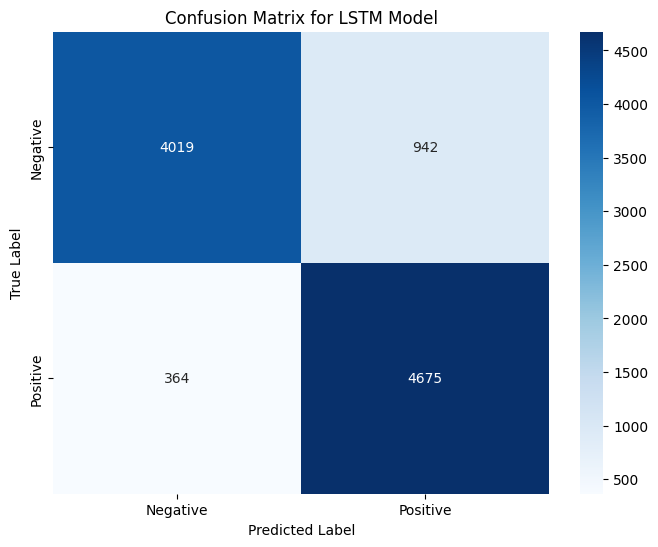

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Generate predictions for the test set
Y_pred_probs = model.predict(X_test)
Y_pred = (Y_pred_probs > 0.5).astype("int32")  # Convert probabilities to binary labels

# Create the confusion matrix
cm = confusion_matrix(Y_test, Y_pred)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix for LSTM Model')
plt.show()


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import accuracy_score
tfidf = TfidfVectorizer(max_features=5000)
X_train = tfidf.fit_transform(train_data['review']).toarray()
X_test = tfidf.transform(test_data['review']).toarray()
Y_train = train_data['sentiment']
Y_test = test_data['sentiment']

# Logistic Regression model
model = LogisticRegression()
model.fit(X_train, Y_train)

# Evaluate the model
Y_pred = model.predict(X_test)
accuracy = accuracy_score(Y_test, Y_pred)
print(f"Test Accuracy: {accuracy}")

# Prediction function
def predict_sentiment(text):
    vectorized_text = tfidf.transform([text]).toarray()
    prediction = model.predict(vectorized_text)
    sentiment = "positive" if prediction[0] == 1 else "negative"
    return sentiment


Test Accuracy: 0.895


Test Accuracy: 0.895
Confusion Matrix:
[[4376  585]
 [ 465 4574]]


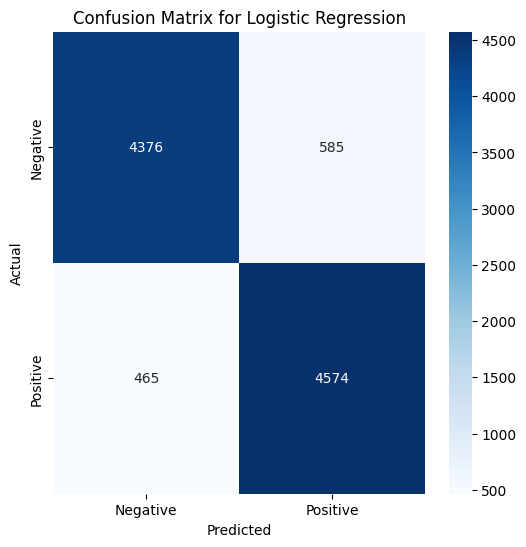

Classification Report:
              precision    recall  f1-score   support

    Negative       0.90      0.88      0.89      4961
    Positive       0.89      0.91      0.90      5039

    accuracy                           0.90     10000
   macro avg       0.90      0.89      0.89     10000
weighted avg       0.90      0.90      0.89     10000

ROC-AUC Score: 0.9616224651107773


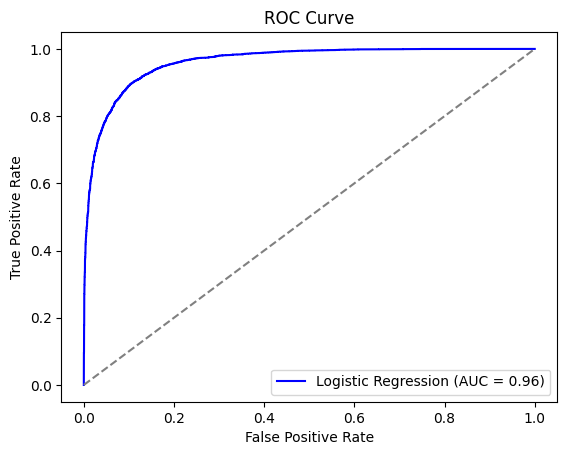

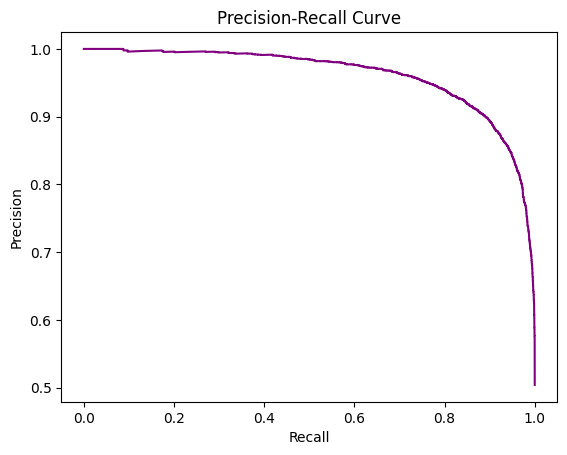

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score, precision_recall_curve, roc_curve
import matplotlib.pyplot as plt
import seaborn as sns

# Predict on the test set
Y_pred = model.predict(X_test)
Y_pred_proba = model.predict_proba(X_test)[:, 1]  # Get probabilities for ROC-AUC

# Accuracy
accuracy = accuracy_score(Y_test, Y_pred)
print(f"Test Accuracy: {accuracy}")

# Confusion Matrix
conf_matrix = confusion_matrix(Y_test, Y_pred)
print("Confusion Matrix:")
print(conf_matrix)

# Visualization of Confusion Matrix
plt.figure(figsize=(6, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=["Negative", "Positive"], yticklabels=["Negative", "Positive"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix for Logistic Regression")
plt.show()

# Classification Report (Precision, Recall, F1-Score)
class_report = classification_report(Y_test, Y_pred, target_names=["Negative", "Positive"])
print("Classification Report:")
print(class_report)

# ROC-AUC Score
roc_auc = roc_auc_score(Y_test, Y_pred_proba)
print(f"ROC-AUC Score: {roc_auc}")

# ROC Curve
fpr, tpr, _ = roc_curve(Y_test, Y_pred_proba)
plt.figure()
plt.plot(fpr, tpr, color='blue', label=f'Logistic Regression (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.show()

# Precision-Recall Curve
precision, recall, _ = precision_recall_curve(Y_test, Y_pred_proba)
plt.figure()
plt.plot(recall, precision, color='purple')
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision-Recall Curve")
plt.show()


In [ ]:
new_review = "This movie was not that good."
predicted_sentiment = predict_sentiment(new_review)
print(f"Predicted Sentiment: {predicted_sentiment}")

new_review = "I didn't like this movie."
predicted_sentiment = predict_sentiment(new_review)
print(f"Predicted Sentiment: {predicted_sentiment}")

new_review = "This movie was fantastic!"
predicted_sentiment = predict_sentiment(new_review)
print(f"Predicted Sentiment: {predicted_sentiment}")


Predicted Sentiment: negative
Predicted Sentiment: negative
Predicted Sentiment: positive


In [ ]:
from sklearn.naive_bayes import MultinomialNB
# Naive Bayes model
model = MultinomialNB()
model.fit(X_train, Y_train)

# Evaluate the model
Y_pred = model.predict(X_test)
accuracy = accuracy_score(Y_test, Y_pred)
print(f"Test Accuracy: {accuracy}")

# Prediction function
def predict_sentiment(text):
    vectorized_text = tfidf.transform([text]).toarray()
    prediction = model.predict(vectorized_text)
    sentiment = "positive" if prediction[0] == 1 else "negative"
    return sentiment

Test Accuracy: 0.8517


Test Accuracy: 0.8517
Confusion Matrix:
[[4229  732]
 [ 751 4288]]


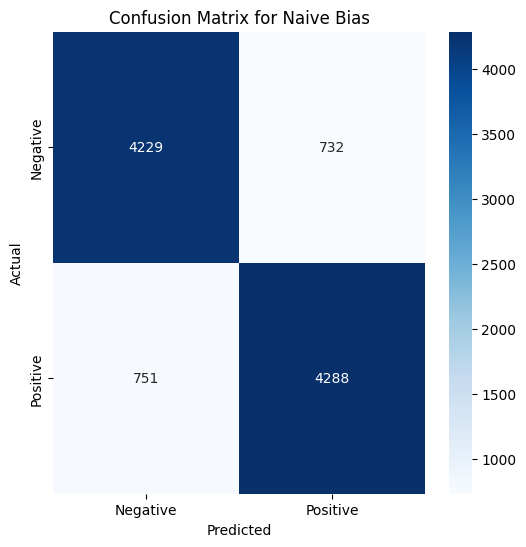

Classification Report:
              precision    recall  f1-score   support

    Negative       0.85      0.85      0.85      4961
    Positive       0.85      0.85      0.85      5039

    accuracy                           0.85     10000
   macro avg       0.85      0.85      0.85     10000
weighted avg       0.85      0.85      0.85     10000

ROC-AUC Score: 0.9295643146929059


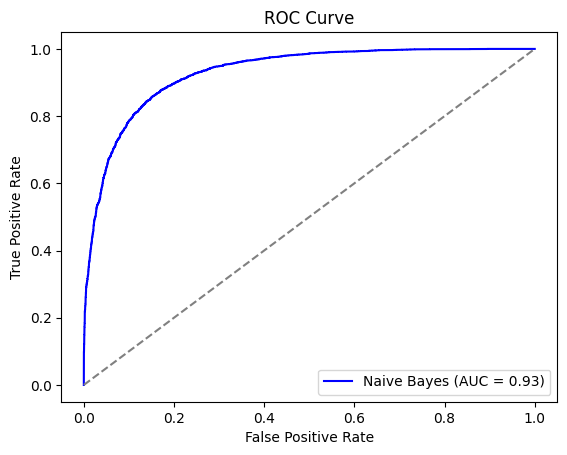

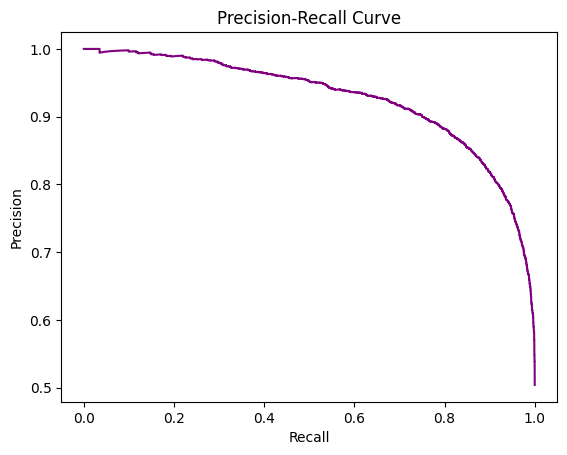

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score, precision_recall_curve, roc_curve
import matplotlib.pyplot as plt
import seaborn as sns

# Predict on the test set
Y_pred = model.predict(X_test)
Y_pred_proba = model.predict_proba(X_test)[:, 1]  # Get probabilities for ROC-AUC

# Accuracy
accuracy = accuracy_score(Y_test, Y_pred)
print(f"Test Accuracy: {accuracy}")

# Confusion Matrix
conf_matrix = confusion_matrix(Y_test, Y_pred)
print("Confusion Matrix:")
print(conf_matrix)

# Visualization of Confusion Matrix
plt.figure(figsize=(6, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=["Negative", "Positive"], yticklabels=["Negative", "Positive"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix for Naive Bias")
plt.show()

# Classification Report (Precision, Recall, F1-Score)
class_report = classification_report(Y_test, Y_pred, target_names=["Negative", "Positive"])
print("Classification Report:")
print(class_report)

# ROC-AUC Score
roc_auc = roc_auc_score(Y_test, Y_pred_proba)
print(f"ROC-AUC Score: {roc_auc}")

# ROC Curve
fpr, tpr, _ = roc_curve(Y_test, Y_pred_proba)
plt.figure()
plt.plot(fpr, tpr, color='blue', label=f'Naive Bayes (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.show()

# Precision-Recall Curve
precision, recall, _ = precision_recall_curve(Y_test, Y_pred_proba)
plt.figure()
plt.plot(recall, precision, color='purple')
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision-Recall Curve")
plt.show()


In [ ]:
new_review = "This movie was not that good."
predicted_sentiment = predict_sentiment(new_review)
print(f"Predicted Sentiment: {predicted_sentiment}")

new_review = "I didn't like this movie."
predicted_sentiment = predict_sentiment(new_review)
print(f"Predicted Sentiment: {predicted_sentiment}")

new_review = "This movie was fantastic!"
predicted_sentiment = predict_sentiment(new_review)
print(f"Predicted Sentiment: {predicted_sentiment}")


Predicted Sentiment: negative
Predicted Sentiment: negative
Predicted Sentiment: positive
